<a href="https://colab.research.google.com/github/sprerak48/Autonomous-tagging-using-Deep-Learning/blob/Prerak/AT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print('Our pythn shared notebook we can code here')

Our pythn shared notebook we can code here


In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d stackoverflow/stacksample

 99% 1.14G/1.15G [00:16<00:00, 69.1MB/s]
100% 1.15G/1.15G [00:16<00:00, 74.3MB/s]


In [5]:
!unzip stacksample


Archive:  stacksample.zip
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [0]:
csv_file = input('Enter the name of your input file: ')
txt_file = input('Enter the name of your output file: ')

text_list = []

with open(csv_file, "r") as my_input_file:
    for line in my_input_file:
        line = line.split(",", 2)
        text_list.append(" ".join(line))

with open(txt_file, "w") as my_output_file:
    my_output_file.write("#1\n")
    my_output_file.write("double({},{})\n".format(len(text_list), 2))
    for line in text_list:
        my_output_file.write("  " + line)
    print('File Successfully written.')

In [0]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import math

questions = pd.read_csv("Questions.csv", encoding='latin1')
answers = pd.read_csv("Answers.csv", encoding='latin1')
tags = pd.read_csv("Tags.csv", encoding='latin1')

In [0]:
ans_per_question = collections.Counter(answers['ParentId'])
answerid,noAnswers= zip(*ans_per_question.most_common())
text = "Avegrage number of answers per question ",np.mean(noAnswers)

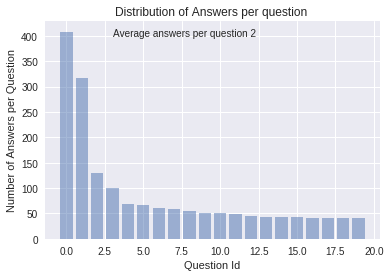

In [0]:
N=20
plt.bar(range(N), noAnswers[:N], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)

plt.ylabel('Number of Answers per Question')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question ')
plt.text(3,400,"Average answers per question "+str(math.ceil((np.mean(noAnswers)))))

plt.show()

In [0]:
print("Top 2 Questions with maximum number of answers \n")
qid = answerid[:2] 

for b,id in zip(questions['Body'],questions['Id']):
    if id in qid:
        #print(id)
        print(b)
        print("................")

Top 2 Questions with maximum number of answers 

<p>This is a <a href="http://stackoverflow.com/questions/tagged/polls">poll</a> asking the Stackoverflow community what <strong>non-programming</strong> books they would recommend to fellow programmers.</p>

<h3>Please read the following before posting:</h3>

<ul>
<li><p>Please post only <em>ONE BOOK PER ANSWER</em>.</p></li>
<li><p>Please <em>search for your recommendation on this page before posting</em> (there are over NINE PAGES so it is advisable to check them all). Many books have already been suggested and we want to avoid duplicates. If you find your recommendation is already present, vote it up or add some commentary.</p></li>
<li><p><strong>Please elaborate</strong> <em>on <strong>why</strong> you think a given book is worth reading</em> <strong><em>from a programmer's perspective.</em></strong></p></li>
</ul>

<p>Note: <a href="http://stackoverflow.com/questions/31274/best-non-development-book-for-software-developers">this art

In [0]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


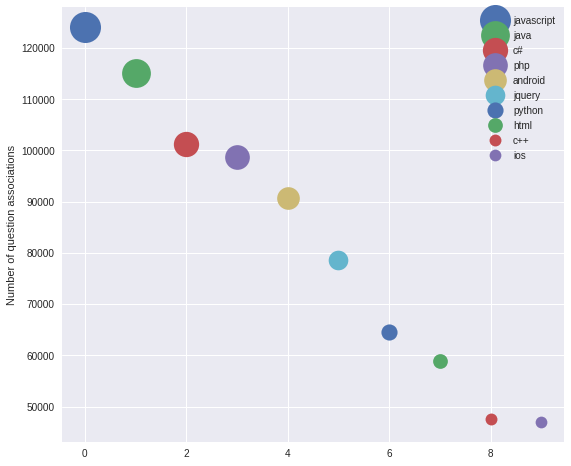

In [0]:
tagCount =  collections.Counter(list(tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [0]:
topQuestions =list(zip(questions["Id"],questions["Score"],questions["Title"]))
topQuestions.sort(key=lambda x: x[1],reverse=True)
for id,s,t in topQuestions[:20]:
    #print("Question id:",id)
    print("Score :",s)
    print("Question Title\t:",t,'\n') 

Score : 5190
Question Title	: How to undo 'git add' before commit? 

Score : 3613
Question Title	: Is Java "pass-by-reference" or "pass-by-value"? 

Score : 2537
Question Title	: Regular expression to match line that doesn't contain a word? 

Score : 2399
Question Title	: Make an existing Git branch track a remote branch? 

Score : 2363
Question Title	: Why does Google prepend while(1); to their JSON responses? 

Score : 1760
Question Title	: How to check if a string contains a specific word in PHP? 

Score : 1759
Question Title	: How do I empty an array in JavaScript? 

Score : 1716
Question Title	: How to find all files containing specific text on Linux? 

Score : 1620
Question Title	: Loop through an array in JavaScript 

Score : 1614
Question Title	: How do you disable browser Autocomplete on web form field / input tag? 

Score : 1613
Question Title	: How do I give text or an image a transparent background using CSS? 

Score : 1567
Question Title	: How can I determine the URL that 

In [0]:
#IDENTIFYING CLUSTERS OF SIMILAR QUESTIONS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from multiprocessing import Pool
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
from itertools import chain
from collections import Counter
import pickle
import scipy.io as scio
from sklearn.decomposition import TruncatedSVD
import scipy.spatial.distance as distance
import scipy.cluster.hierarchy as hierarchy
from scipy.stats import pearsonr

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
dat = pd.read_csv("Questions.csv", encoding='latin1')
dat['Title'].fillna("None", inplace=True)
dat['Score'].fillna(0, inplace=True)

In [0]:
selected_ids = np.random.choice(range(dat.shape[0]), 20000, replace=False)
sample = dat.loc[selected_ids, :]
sample.shape

(20000, 7)

In [0]:
sample.head()


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
1080291,35297250,883354.0,2016-02-09T16:33:02Z,NaN,0,In CakePHP 3.0 what is the best way to impleme...,<p>Android has a naming convention for its App...
679425,23211320,3559006.0,2014-04-22T05:45:45Z,NaN,1,XSLT importing a partial XML segment into XML ...,<p>I have a xml document that I need to replac...
146478,5806200,687784.0,2011-04-27T14:59:10Z,NaN,2,jQuery/PHP Validation From Common Source,<p>I have a Model class for a Generic Object t...
713657,24294350,3084471.0,2014-06-18T20:19:31Z,NaN,0,Start at specific track in given playlist with...,<p>Im trying to start a specific track using s...
1195090,38370730,741637.0,2016-07-14T09:39:15Z,NaN,0,Using http headers for passing data for logging,<p>I am developing a windows application which...


In [0]:
def purify_string(html):
    return re.sub('(\r\n)+|\r+|\n+', " ", re.sub('<[^<]+?>', '', html))


In [0]:
corpus = sample.ix[:, 'Body'].apply(purify_string)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [0]:
def combine_title_body(tnb):
    return tnb[0] + " " + tnb[1]

In [0]:
p = Pool(8)
combined_corpus = p.map(combine_title_body, zip(dat['Title'], corpus))
p.close()

In [0]:
combined_corpus[:2]


['SQLStatement.execute() - multiple queries in one statement Android has a naming convention for its App Links verification that is not allowed in CakePhP.  Android forces your App Links verification to be as follows:   www.exampledomain.com/.well-known/assetlinks.json/ PhP won\'t allow a class named ".WellKnownController", nor a function named "assetlinks.json".  So how do I make my CakePhP 3.0 website respond to this POST? ',
 'Good branching and merging tutorials for TortoiseSVN? I have a xml document that I need to replace specific nodes with partial xml segments that contains both nodes as well as processing-instructions.  I want to preserve the PI\'s but am running into issues in the replacement. Segment example: general.xml &lt;root&gt;   &lt;!--General Settings --&gt;   &lt;?mapping EnvironmentSetting="envname"?&gt;   &lt;setting name="SubscriptionName" value="*" /&gt; &lt;/root&gt; Source xml: &lt;environment&gt;   &lt;General /&gt; &lt;/environment&gt; Transform -  &lt;xsl:te

In [0]:
lem = WordNetLemmatizer()
def cond_tokenize(t):
    if t is None:
        return []
    else:
        return [lem.lemmatize(w.lower()) for w in word_tokenize(t)]

p = Pool(8)
tokens = list(p.imap(cond_tokenize, combined_corpus))
p.close()

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 431, in _handle_workers
    maxtasksperchild, wrap_exception)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 268, in _maintain_pool
    wrap_exception)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 255, in _repopulate_pool_static
    w.start()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/usr/lib/python3.6/multiprocessing/context.py", line 277, in _Popen
    return Popen(process_obj)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 19, in __init__
    self._launch(process_obj)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 66, in _launch
    self.pi

In [0]:
pure_tokens = [" ".join(sent) for sent in tokens]
print(tokens[0]) # this are the single lemmatized and stemmed tokens
print(pure_tokens[0]) # these are the tokens combined in original form

['sqlstatement.execute', '(', ')', '-', 'multiple', 'query', 'in', 'one', 'statement', 'i', 'have', 'been', 'all', 'over', 'google', 'looking', 'for', 'this', ',', 'i', 'ca', "n't", 'come', 'up', 'with', 'a', 'clear', 'solution', '.', 'i', 'have', 'a', 'chatview', 'that', 'render', 'a', 'collectionview', 'of', 'message', '(', 'messagesview', ')', '.', 'i', 'need', 'to', 'wait', 'until', 'all', 'the', 'message', 'are', 'fetched', 'and', 'rendered', 'before', 'i', 'can', 'run', 'a', 'function', 'to', 'scroll', 'to', 'the', 'bottom', 'of', 'the', 'list', 'of', 'message', '.', 'here', 'is', 'a', 'stripped', 'up', 'version', 'of', 'my', 'code', '.', 'var', 'socket', '=', 'io.connect', '(', ')', ',', 'marionette', '=', 'require', '(', "'backbone.marionette", "'", ')', ',', 'messagescollection', '=', 'require', '(', "'../collections/messages", "'", ')', ',', 'messagesview', '=', 'require', '(', "'./messages", "'", ')', ',', 'messagemodel', '=', 'require', '(', "'../models/message", "'", ')', 

In [0]:
vectorizer = TfidfVectorizer(min_df=1, max_features=2000, stop_words='english', ngram_range=[1, 1], sublinear_tf=True)
tfidf = vectorizer.fit_transform(pure_tokens) # this is the vector matrix of the tfidf

In [0]:
idfs = pd.DataFrame([[v, k] for k, v in vectorizer.vocabulary_.items()], columns=['id', 'word']).sort_values('id')
idfs['idf'] = vectorizer.idf_

In [0]:
print(idfs.sort_values('idf').head(20))

       id      word       idf
94   1867     using  1.999179
20    394      code  2.025458
235   840        gt  2.055315
77   1091        lt  2.125674
99   1043      like  2.193742
399  1916      want  2.290671
47   1193       new  2.342710
302  1858       use  2.361847
130   726      file  2.401458
221  1947      work  2.451630
174   592       doe  2.454623
304   378     class  2.461715
342  1921       way  2.503103
254   662     error  2.526987
53    501      data  2.538564
16    782  function  2.557607
421  1881     value  2.576053
12   1188      need  2.612994
328  1502    return  2.623587
210  1369   problem  2.662098


In [0]:
tsvd = TruncatedSVD(n_components=500) # TODO this n_components=500 is a hyperparameter, look into it
transformed = tsvd.fit_transform(tfidf)

In [0]:
np.sum(tsvd.explained_variance_ratio_)


0.583466922257338

In [0]:
transformed.shape

(20000, 500)

In [0]:
D = distance.pdist(transformed, 'cosine')

In [0]:
L = hierarchy.linkage(D)
np.mean(D)

0.9342161160190237

In [0]:
cls = hierarchy.fcluster(L, 0.71, criterion='inconsistent')


In [0]:
df_cls = pd.DataFrame({'Pos': selected_ids, 'Cluster': cls})
cnts = df_cls.groupby('Cluster').size().sort_values(ascending=False)
cnts.sort_values(ascending=False).head()

Cluster
3718    38
1945    28
3624    19
1171    18
1324    17
dtype: int64

In [0]:
bc = pd.concat([sample, df_cls.set_index('Pos')], axis=1)
bc.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body,Cluster
Pos,,,,,,,,
784469,26507960,1971279.0,2014-10-22T12:55:56Z,NaN,0,Callback for backbone child view?,<p>I have been all over google looking for thi...,9440
191262,7326910,162045.0,2011-09-06T22:29:08Z,2013-11-11T02:56:00Z,5,Tools for protocol simulation,<p>My software development team has recently f...,15105
1244409,39673690,6501155.0,2016-09-24T07:20:28Z,NaN,1,HTML/CSS Progess Bar shows on browser but does...,<p>Im helping a friend create a resume and wan...,4614
915553,30558920,4599151.0,2015-05-31T15:04:13Z,NaN,0,How to use Thread.sleep() in this example in a...,<p>I have some example code on main thread:</p...,7014
608088,20952790,1542555.0,2014-01-06T15:02:44Z,NaN,-1,Umlauts not working by exporting a CSV-File,<p>i have a problem by exporting data with uml...,2804


In [0]:
stats = bc.groupby('Cluster')['Score'].describe().unstack()


In [0]:
stats.sort_values(ascending=False).head(10)

      Cluster
min   13128      544.0
75%   13128      544.0
mean  13128      544.0
25%   13128      544.0
50%   13128      544.0
max   13128      544.0
      509        409.0
min   8670       396.0
50%   8670       396.0
25%   8670       396.0
dtype: float64

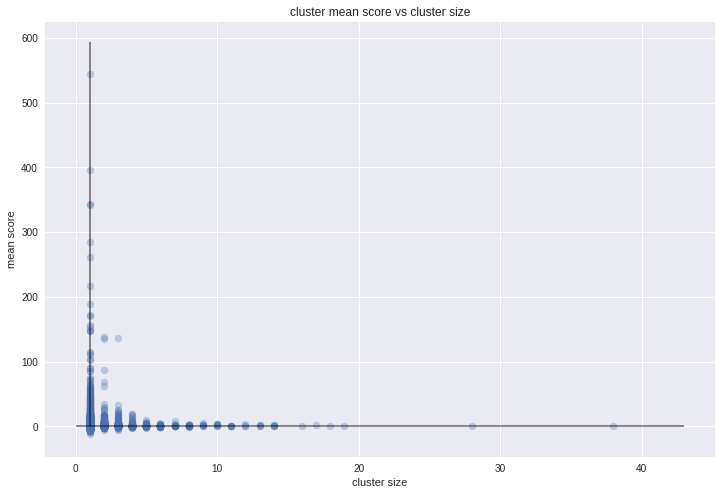

In [0]:
plt.figure(figsize=(12, 8))
plt.hlines([0], xmin=0, xmax=np.max(stats['count']) + 5, alpha=0.5)
plt.vlines([1], ymin=0, ymax=np.max(stats['mean']) + 50, alpha=0.5)
plt.scatter(stats['count'], stats['mean'], alpha=0.3)
plt.title("cluster mean score vs cluster size")
plt.xlabel("cluster size")
plt.ylabel("mean score")
plt.show()

In [0]:
bc.loc[bc['Cluster'] == cnts.index[0]][['Score', 'Title', 'Body']]


,Score,Title,Body
Pos,,,
892629,0,How to arrange table td using rowspan,<p>I have to arrange table cells as shown in t...
63830,3,Creating the same event for 2 different elemen...,"<p>Hey guys,\nI'd like to create a toggle even..."
962971,1,Webdriver how replace dynamic locator to use P...,<p>Here is html code:</p>\n\n<pre><code>&lt;ta...
162911,0,include button into .cs file,<p>I'm trying to read a text file containing t...
200835,1,jquery + css - hover with parameter,"<pre><code>&lt;table id=""tab""&gt;\n &lt;tr ..."
265742,0,Can I exclude a div tag/tr tag get update insi...,<p>Below is not a valid code( I just show some...
850020,1,table Alignment issue - html to pdf conversion...,<p>I am facing issues in table alignment when ...
409782,0,access variables inside two ajax functions,<p>can i achieve this even more simpler way ??...
869549,0,Getting text and sending it to a php function ...,<p>I have a php function which displays all th...


In [0]:
bc.loc[bc['Cluster'] == cnts.index[1]][['Score', 'Title', 'Body']]


,Score,Title,Body
Pos,,,
905481,0,how to extract multiple cells from different r...,<p>Currently I need to extract value from diff...
1135214,1,Loop through range and append values based on ...,"<p>Search the web and SO, but couldn't find an..."
860926,0,Excel active sheet row count reflect previousl...,<p>I have imported a csv file to sheet(4). I w...
1205404,0,Creating a txt file from Excel spreadsheet,<p>I am using the below code to create a .txt ...
1016298,1,Populating TreeView with column header and sub...,<p>I am new to tree view control and would lik...
1220602,0,How to use vlookup to find values in a workshe...,<p>Im trying to pull the unit and price from a...
1078420,1,Dynamic For Loops in VBA,"<p>Being quite new at VBA, I would appreciate ..."
998583,0,Compile error 'named argument not found',<p>Excel 2007</p>\n\n<pre><code>Sub Filtered_d...
715637,0,Use a loop to delete data in a table range fro...,<p>I'd like to setup a macro to remove data fr...


In [0]:
bc.loc[bc['Cluster'] == cnts.index[2]][['Score', 'Title', 'Body']]


,Score,Title,Body
Pos,,,
638470,0,Event after selecting item from checkbox multi...,<p>I have to display second select list if par...
652267,-1,Jquery Ajax not able to overwrite the span class,<p>I am getting the value in the script which ...
1200435,2,Dynamically append dropdown's value text to an...,"<pre><code>&lt;select id=""mg_sport_game_id1""&g..."
416688,0,dynamic dropdown to checkbox,<p>I would like to convert my current code to ...
1184502,0,How to display a select only when other select...,<p>I have 4 selects on a page and only the fir...
721535,0,I am trying to add a text area based on Other ...,<p>I am trying to add a textarea based on the ...
177165,0,Populate DropDown and Get Selected Value From ...,<p>I have the code to select the values from a...
546443,0,Need function to run on selecting an option in...,<p>Hi I know this has probably been asked befo...
1105621,0,option list using array - php,<p><strong>Data from database are already okay...


In [0]:
import numpy as np
import pandas as pd
import gensim
from bs4 import BeautifulSoup
import nltk
import re

In [0]:
questions_df = pd.read_csv("Questions.csv", encoding='latin1')
tags_df = pd.read_csv("Tags.csv", encoding='latin1')
questions_df.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [0]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from textblob import TextBlob as tb
from sklearn.metrics import jaccard_similarity_score
from html.parser import HTMLParser
import collections
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
dataset_dir = "../content/"
dataset_dir_questions = "Questions.csv"
dataset_dir_answers = "Answers.csv"
dataset_dir_tags = "Tags.csv"
# for offline run
# dataset_dir = "/home/su/Downloads/stacksample"
# list the files in the dataset directory
from subprocess import check_output
print(check_output(["ls", dataset_dir]).decode("utf8"))
cachedStopWords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Answers.csv
kaggle.json
Questions.csv
sample_data
stacksample.zip
Tags.csv



In [0]:
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [0]:
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)
def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)
def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [0]:
def normalize(str):
    return ' '.join([word for word in re.sub(r'[^\w]', ' ', strip_tags(str)).lower().split() if word not in cachedStopWords and len(word) > 1 and not word.isdigit()])

In [0]:
questions_df = pd.read_csv(dataset_dir+dataset_dir_questions, encoding='latin1').iloc[::10000, :]
answers_df = pd.read_csv(dataset_dir+dataset_dir_answers, encoding='latin1').iloc[::1000, :]
tags_df = pd.read_csv(dataset_dir+dataset_dir_tags, encoding='latin1').iloc[::1000, :]


In [0]:
# Calculate dimensionality
questions_df.shape 
answers_df.shape 
tags_df.shape 

# Sample dataframe - uncomment to view
questions_df.head(10)
answers_df.head(10)
tags_df.head(10) 

,Id,Tag
0,80,flex
1000,33550,computer-algebra-systems
2000,60740,png
3000,90530,desktop-application
4000,119550,wcf
5000,145720,code-reuse
6000,171020,iis
7000,194150,soundchannel
8000,215810,ubuntu
9000,238660,.net


In [0]:
# Calculate dimensionality
questions_df.shape 
answers_df.shape 
tags_df.shape 

# Sample dataframe - uncomment to view
questions_df.head(10).loc[:, 'Title':'Body']
answers_df.head(10).loc[:, 'Body':]
tags_df.head(10)

,Id,Tag
0,80,flex
1000,33550,computer-algebra-systems
2000,60740,png
3000,90530,desktop-application
4000,119550,wcf
5000,145720,code-reuse
6000,171020,iis
7000,194150,soundchannel
8000,215810,ubuntu
9000,238660,.net


In [0]:
for index, row in questions_df.iterrows():
    questions_df.at[index, 'Body']= normalize(row[6])
    questions_df.at[index, 'Title']= normalize(row[5])
for index, row in answers_df.iterrows():
    answers_df.at[index, 'Body']= normalize(row[5])

In [0]:
# Calculate dimensionality
# questions_df.shape 
# answers_df.shape 
# tags_df.shape 

# Sample dataframe - uncomment to view
questions_df.head(10).loc[:, 'Title':'Body']
# answers_df.head(10).loc[:, 'Body':]
# tags_df.head(10) 

,Title,Body
0,sqlstatement execute multiple queries one stat...,written database generation script sql want ex...
10000,continuous build net java projects single machine,possible set continuous build projects written...
20000,wix installing service localservice,trying get application installer via wix exact...
30000,language cybersyn cyberstride implemented,aware implemented ibm mainframe architecture a...
40000,javac package found error,trying compile java file imports packages crea...
50000,pages stall ad related,notice bad quality websites ads piece site loa...
60000,i18n translation problem,translate time zones russian done things model...
70000,submit asp net mvc form using javascript still...,asp net mvc form working perfectly client side...
80000,custom environment variables php,way set custom variable environment_name apach...
90000,solve data conflict string infile open,include iostream include fstream include cstdl...


In [0]:
tfidf_dict={}
qID_dict={}
bloblist=[]
idlist=[]

for index, row in questions_df.iterrows():
    # also append title to text body
    bloblist.append(tb(row[6]+" "+row[5]))
    idlist.append(row[0])

for i, blob in enumerate(bloblist):
    if i < 5:
        print("Top words in question ID {}".format(idlist[i]))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        if i < 5:
            print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
            
        # word dict    
        if word in tfidf_dict:
            tfidf_dict[word].append([idlist[i],round(score, 5)])
        else:
            tfidf_dict[word] = [[idlist[i],round(score, 5)]]
        
        # qID dict
        if idlist[i] in qID_dict:
            qID_dict[idlist[i]].append(word)
        else:
            lst=[]
            lst.append(word)
            qID_dict[idlist[i]]=lst

Top words in question ID 80
	Word: sqlstatement, TF-IDF: 0.17504
	Word: integer, TF-IDF: 0.15589
	Word: sqlconnection, TF-IDF: 0.15004
	Word: varchar, TF-IDF: 0.12503
	Word: stream, TF-IDF: 0.10003
Top words in question ID 637960
	Word: projects, TF-IDF: 0.36542
	Word: build, TF-IDF: 0.26973
	Word: machine, TF-IDF: 0.23669
	Word: single, TF-IDF: 0.21207
	Word: continuous, TF-IDF: 0.20249
Top words in question ID 1114610
	Word: localservice, TF-IDF: 0.14192
	Word: service, TF-IDF: 0.13574
	Word: myprogramserviceinstaller, TF-IDF: 0.10644
	Word: yes, TF-IDF: 0.08294
	Word: installer, TF-IDF: 0.07096
Top words in question ID 1549760
	Word: implemented, TF-IDF: 0.21201
	Word: ibm, TF-IDF: 0.15664
	Word: language, TF-IDF: 0.12207
	Word: anyone, TF-IDF: 0.08903
	Word: mainframe, TF-IDF: 0.07832
Top words in question ID 1971800
	Word: import, TF-IDF: 0.35821
	Word: java, TF-IDF: 0.31202
	Word: commchange, TF-IDF: 0.27985
	Word: frame, TF-IDF: 0.25251
	Word: db, TF-IDF: 0.17148


In [0]:
i = 1
for k, v in tfidf_dict.items():
    print(k, v)
    if i == 10:
        break
    i+=1

sqlstatement [[80, 0.17504]]
integer [[80, 0.15589]]
sqlconnection [[80, 0.15004]]
varchar [[80, 0.12503]]
stream [[80, 0.10003]]
projects [[637960, 0.36542]]
build [[637960, 0.26973], [39810190, 0.11059]]
machine [[637960, 0.23669], [15133550, 0.19862]]
single [[637960, 0.21207]]
continuous [[637960, 0.20249]]


In [0]:
def predict_duplicate(query):
    
    def top_words(text):
        counts = collections.Counter(text.split())
        return [elem for elem, _ in counts.most_common(5)]

    termList=top_words(query)
    
    for k, v in qID_dict.items():
        if jaccard_similarity_score(termList, qID_dict[k]) >= 0.75:
            print("Duplicate Question. Question exists with qID: " + k)
            return
    
print("Not a Duplicate Question.")

Not a Duplicate Question.


In [0]:
inputQ_title="What is the most efficient way to deep clone an object in JavaScript?"
inputQ_body="""What is the most efficient way to clone a JavaScript object? 
I've seen obj = eval(uneval(o)); being used, 
but that's non-standard and only supported by Firefox.
I've done things like obj = JSON.parse(JSON.stringify(o)); but question the efficiency. 
I've also seen recursive copying functions with various flaws. 
I'm surprised no canonical solution exists."""
inputQ_tags="javascript, json, object"

# normalize
normalized_query=normalize(inputQ_title + " " + inputQ_body+ " " + inputQ_tags)

# predict whether duplicate question
predict_duplicate(normalized_query)

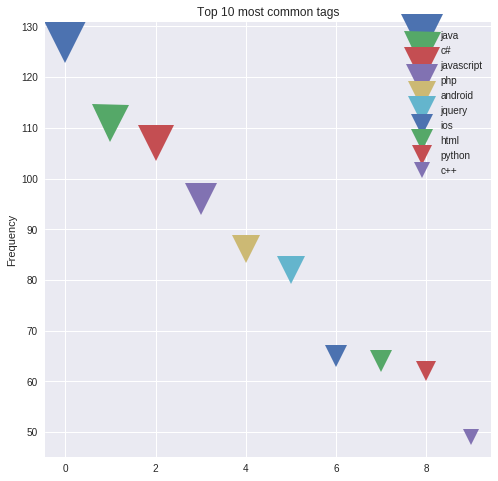

In [0]:
tags_tally = collections.Counter(tags_df['Tag'])

# x = tag name, y = tag frequency
x, y = zip(*tags_tally.most_common(10))

colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

area = [i/3 for i in list(y)]   # 0 to 15 point radiuses
plt.figure(figsize=(8,8))
plt.ylabel("Frequency")
plt.title("Top 10 most common tags")
for i in range(len(y)):
        plt.plot(i,y[i], marker='v', linestyle='',ms=area[i],label=x[i])

plt.legend(numpoints=1)
plt.show()

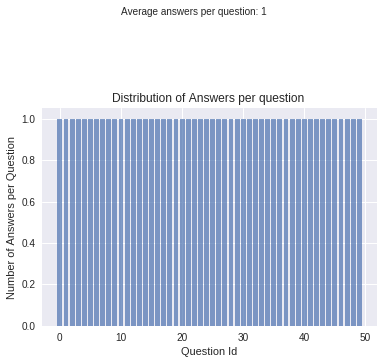

In [0]:
ans_per_question = collections.Counter(answers_df['ParentId'])
answerid,noAnswers= zip(*ans_per_question.most_common())

N=50
plt.bar(range(N), noAnswers[:N], align='center', alpha=0.7)
#plt.xticks(y_pos, objects)

plt.ylabel('Number of Answers per Question')
plt.xlabel('Question Id')
plt.title('Distribution of Answers per question ')
plt.text(10,1.5,"Average answers per question: "+str(math.floor((np.mean(noAnswers)))))

plt.show()

In [0]:
#word2vec embedding
import csv
outputDatafile = open('Tags.csv', 'r')
outputReader = csv.reader(outputDatafile, delimiter=',', quoting=csv.QUOTE_NONE)

print ("OutputReader datatype :",type(outputReader))
inputData= []

for row in outputReader:
    inputData.append(row)
    

    print(inputData)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
!NotebookApp.iopub_data_rate_limit=1000000000000000

/bin/bash: NotebookApp.iopub_data_rate_limit=1000000000000000: command not found


In [0]:
vocab_size = 10000
data,count, dictinory, reverse_dictionary = collect_data(vocabulary_size=vocab_size)

window_size = 3
vector_dim = 300
epochs = 25

valid_size = 16
valid_window = 100
valid_examples = np.random.choice(valid_window,valid_size,replace=False)

NameError: ignored

In [0]:
sampling_table = sequence.make_sampling_table(vocab_size)
couples, labels = skipgrams(data, vocab_size, window_size, sampling_table=sampling_table)
word_target, word_context = zip(*couples)
word_target = np.array(word_target,dtype="int32")
word_context = np.array(word_context,dtype="int32")

print(couples[:10], labels[:10])

In [0]:

import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# load ascii text and covert to lowercase
filename = "Tags.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

In [0]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [0]:
n_chars = len(raw_text)
n_vocab = len(chars)
print ("tags Characters: ", n_chars)
print ("tags Vocab: ", n_vocab)

Total Characters:  72977847
Total Vocab:  45


In [0]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("tags Patterns: ", n_patterns)

In [0]:
import csv
import io
import pandas as pd

questions = pd.read_csv("Questions.csv", encoding='latin1')
answers = pd.read_csv("Answers.csv", encoding='latin1')
tags = pd.read_csv("Tags.csv", encoding='latin1')

In [0]:
questions.shape
answers.shape
tags.shape

(3750994, 2)

In [0]:
from collections import Counter
import numpy as np 
import string
import re

In [0]:
def clean_text(text):
    global EMPTY
    EMPTY = ''
    
    if not isinstance(text, str): 
        return text
    text = re.sub('<pre><code>.*?</code></pre>', EMPTY, text)

    def replace_link(match):
        return EMPTY if re.match('[a-z]+://', match.group(1)) else match.group(1)
    
    text = re.sub('<a[^>]+>(.*)</a>', replace_link, text)
    return re.sub('<[^>]+>', EMPTY, text)

In [0]:
questions['Text'] = questions['Body'].apply(clean_text).str.lower()
questions.Text = questions.Text.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [0]:
answers['Text'] = answers['Body'].apply(clean_text).str.lower()
answers.Text = answers.Text.apply(lambda x: x.replace('"','').replace("\n","").replace("\t",""))

In [0]:
tags['Tag'].nunique()

37034

In [0]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(10,6))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


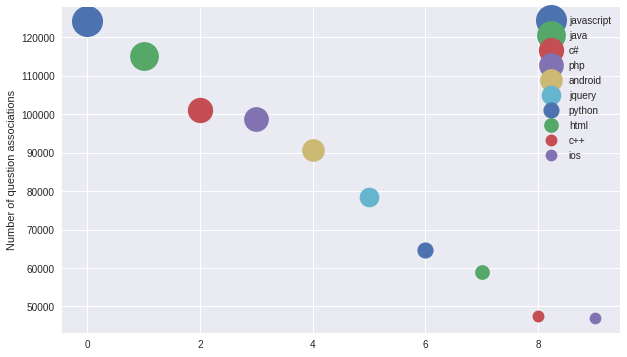

In [0]:
import collections
import matplotlib.pyplot as plt
tagCount =  collections.Counter(list(tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [0]:
tags = tags[(tags.Tag == 'c#') | (tags.Tag == 'java') | (tags.Tag == 'php') | (tags.Tag =='javascript') | (tags.Tag =='jquery') | (tags.Tag == 'android') | (tags.Tag == 'c++') | (tags.Tag == 'iphone') | (tags.Tag == 'python') | (tags.Tag == 'asp.net')]

In [0]:
tags['Tag'].value_counts()

javascript    124155
java          115212
c#            101186
php            98808
android        90659
jquery         78542
python         64601
c++            47591
asp.net        29970
iphone         21539
Name: Tag, dtype: int64

https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/stack_over_flow_auto_tagging.ipynb

In [0]:
import pandas as pd
df = pd.read_csv("../content/Questions.csv", encoding="ISO-8859-1")
tags = pd.read_csv("../content/Tags.csv", encoding="ISO-8859-1", dtype={'Tag': str})

In [9]:
tags['Tag'] = tags['Tag'].astype(str)
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.head(5)

Id
80                            flex actionscript-3 air
90       svn tortoisesvn branch branching-and-merging
120                               sql asp.net sitemap
180    algorithm language-agnostic colors color-space
260           c# .net scripting compiler-construction
Name: Tag, dtype: object

In [10]:
grouped_tags.reset_index()
grouped_tags_final = pd.DataFrame({'Id':grouped_tags.index, 'Tags':grouped_tags.values})
grouped_tags_final.head(5)


,Id,Tags
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction


In [11]:
df.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)
df = df.merge(grouped_tags_final, on='Id')
df.head(5)

,Id,Score,Title,Body,Tags
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [0]:
new_df = df[df['Score']>3]

Text(0.5, 1.0, 'Ratio of missing values per columns')

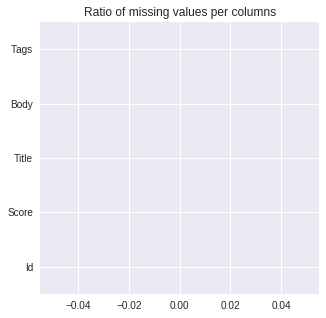

In [13]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5, 5))
new_df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [14]:
print('Dupplicate entries: {}'.format(new_df.duplicated().sum()))
new_df.drop_duplicates(inplace = True)

Dupplicate entries: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
new_df.head(5)

,Title,Body,Tags
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [18]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: x.split())
all_tags = [item for sublist in new_df['Tags'].values for item in sublist]
len(all_tags)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


389745

In [19]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

19085

In [0]:
import nltk
flat_list = [item for sublist in new_df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [22]:
tags_features

['c#',
 'java',
 'javascript',
 'android',
 'python',
 'c++',
 'php',
 'jquery',
 'ios',
 '.net',
 'html',
 'css',
 'c',
 'objective-c',
 'iphone',
 'ruby-on-rails',
 'sql',
 'asp.net',
 'mysql',
 'ruby',
 'r',
 'asp.net-mvc',
 'sql-server',
 'linux',
 'git',
 'angularjs',
 'django',
 'node.js',
 'arrays',
 'algorithm',
 'wpf',
 'performance',
 'xcode',
 'string',
 'regex',
 'eclipse',
 'windows',
 'multithreading',
 'scala',
 'json',
 'haskell',
 'xml',
 'html5',
 'osx',
 'swift',
 'c++11',
 'database',
 'spring',
 'visual-studio',
 'unit-testing',
 'ajax',
 'bash',
 'delphi',
 'linq',
 'winforms',
 'ruby-on-rails-3',
 'perl',
 'visual-studio-2010',
 'entity-framework',
 'generics',
 'mongodb',
 'debugging',
 'oracle',
 'cocoa',
 'security',
 'hibernate',
 'css3',
 'list',
 'templates',
 'cocoa-touch',
 'postgresql',
 'image',
 'facebook',
 'google-chrome',
 'qt',
 'oop',
 'twitter-bootstrap',
 'asp.net-mvc-3',
 'shell',
 'numpy',
 'vim',
 'rest',
 'swing',
 'maven',
 'gcc',
 'matlab'

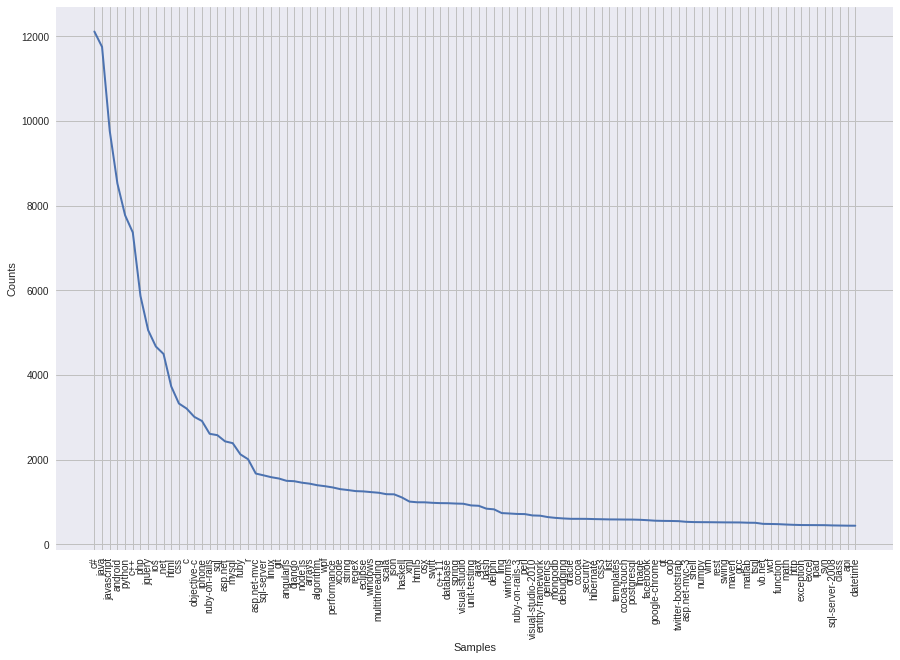

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [0]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [25]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: most_common(x))
new_df['Tags'] = new_df['Tags'].apply(lambda x: x if len(x)>0 else None)
new_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(126833, 3)

In [26]:
new_df.dropna(subset=['Tags'], inplace=True)
new_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(108856, 3)

In [29]:
from bs4 import BeautifulSoup
import re

new_df['Body'] = new_df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer


new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x)) 
token=ToktokTokenizer()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [0]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [0]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [40]:
import re
import nltk
nltk.download('stopwords')

new_df['Body'] = new_df['Body'].apply(lambda x: clean_punct(x)) 
new_df['Body'][2]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


'has anyone got experience creating sql-based asp.net site-map providers i have got the default xml file websitemap working properly with my menu and sitemappath controls but i will need a way for the users of my site to create and modify pages dynamically i need to tie page viewing permissions into the standard asp.net membership system as well'

In [0]:
from nltk.corpus import stopwords


lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [0]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

In [45]:
import nltk
nltk.download('wordnet')

new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x)) 
new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x)) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: clean_punct(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x)) 
new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x)) 

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

no_topics = 40
text = new_df['Body']
vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                       max_features=1000)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import numpy as np


TF_IDF_matrix = vectorizer_train.fit_transform(text)
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(TF_IDF_matrix)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")

In [53]:
no_top_words = 20
display_topics(lda, vectorizer_train.get_feature_names(), no_top_words)

--------------------------------------------
Topic 0:
node fragment xml child parent cache tree transform children document attribute element fetch schema namespace parse root tag elements structure
--------------------------------------------
--------------------------------------------
Topic 1:
use would like question know find one way understand good code make look java something seem example book answer read
--------------------------------------------
--------------------------------------------
Topic 2:
error exception throw catch token try get message err code fail run file use unknown crash new log info stack
--------------------------------------------
--------------------------------------------
Topic 3:
thread process run task mac program wait time start exit use stop call application execute os linux windows block console
--------------------------------------------
--------------------------------------------
Topic 4:
difference printf res double sequence tag explain someo

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

X1 = new_df['Body']
X2 = new_df['Title']
y = new_df['Tags']

multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [0]:
vectorizer_X1 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

vectorizer_X2 = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

****Model training and testing****

In [86]:
from sklearn.model_selection import train_test_split

X1_tfidf = vectorizer_X1.fit_transform(X1)
X2_tfidf = vectorizer_X2.fit_transform(X2)

X_tfidf = np.hstack([X1_tfidf,X2_tfidf])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size = 0.2, random_state = 0) # Do 80/20 split

ValueError: ignored

In [0]:
def avg_jacard(y_true,y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)
    
    return jacard.mean()*100

def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")    

In [79]:
import pickle
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.multiclass import OneVsRestClassifier


dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

NameError: ignored

In [80]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

NameError: ignored

In [81]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

NameError: ignored

In [0]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [85]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


In [83]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

NameError: ignored

In [87]:
CV_svc.best_params_

NameError: ignored

In [88]:
best_model = CV_svc.best_estimator_
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

NameError: ignored

****Model end****

In [89]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

NameError: ignored

In [0]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [93]:
import keras, hyperopt, tensorflow


feature_names = vectorizer_X1.get_feature_names() + vectorizer_X2.get_feature_names()
print_top10(feature_names, best_model, multilabel_binarizer.classes_)


NameError: ignored